### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset

In [2]:
category_tree = pd.read_csv("category_tree.csv")
events = pd.read_csv("events.csv",nrows=10000)
item_properties_part1 = pd.read_csv("item_properties_part1.csv",nrows=10000)
item_properties_part2 = pd.read_csv("item_properties_part2.csv",nrows=10000)

In [3]:
# events['event'].value_counts()

In [4]:
# Merge item properties parts first
# item_properties = pd.merge(item_properties_part1, item_properties_part2, on='itemid', how='inner')

# Now merge with events
# events = pd.merge(events, item_properties, on='itemid', how='inner')


In [5]:
events['event'].value_counts()

event
view           9661
addtocart       250
transaction      89
Name: count, dtype: int64

In [6]:
# merged_data['event'].value_counts()

In [7]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      10000 non-null  int64  
 1   visitorid      10000 non-null  int64  
 2   event          10000 non-null  object 
 3   itemid         10000 non-null  int64  
 4   transactionid  89 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB


### Step 3: Explore the Data

In [8]:
category_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [9]:
category_tree.shape

(1669, 2)

In [10]:
category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [11]:
category_tree.describe()

,categoryid,parentid
count,1669.000000,1644.000000
mean,849.285201,847.571168
std,490.195116,505.058485
min,0.000000,8.000000
25%,427.000000,381.000000
50%,848.000000,866.000000
75%,1273.000000,1291.000000
max,1698.000000,1698.000000


In [12]:
category_tree.isnull().sum()

categoryid     0
parentid      25
dtype: int64

In [13]:
category_tree.duplicated().sum()

0

In [14]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [15]:
events.shape

(10000, 5)

In [16]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      10000 non-null  int64  
 1   visitorid      10000 non-null  int64  
 2   event          10000 non-null  object 
 3   itemid         10000 non-null  int64  
 4   transactionid  89 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB


In [17]:
events.describe()

,timestamp,visitorid,itemid,transactionid
count,1.000000e+04,1.000000e+04,10000.000000,89.000000
mean,1.433191e+12,6.958063e+05,233987.451100,10117.213483
std,2.004590e+07,4.095118e+05,133807.251961,5404.257073
min,1.433138e+12,1.370000e+02,6.000000,118.000000
25%,1.433178e+12,3.224070e+05,119022.750000,6344.000000
50%,1.433192e+12,6.853710e+05,235828.000000,10874.000000
75%,1.433205e+12,1.054562e+06,349419.250000,15155.000000
max,1.433225e+12,1.407340e+06,466864.000000,17497.000000


In [18]:
events.isnull().sum()

timestamp           0
visitorid           0
event               0
itemid              0
transactionid    9911
dtype: int64

In [19]:
events.duplicated().sum()

0

In [20]:
item_properties_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10000 non-null  int64 
 1   itemid     10000 non-null  int64 
 2   property   10000 non-null  object
 3   value      10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [21]:
item_properties_part1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [22]:
item_properties_part1.shape

(10000, 4)

In [23]:
item_properties_part1.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [24]:
item_properties_part1.duplicated().sum()

0

In [25]:
item_properties_part2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [26]:
item_properties_part2.shape

(10000, 4)

In [27]:
item_properties_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10000 non-null  int64 
 1   itemid     10000 non-null  int64 
 2   property   10000 non-null  object
 3   value      10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [28]:
item_properties_part2.describe()

,timestamp,itemid
count,1.000000e+04,10000.000000
mean,1.435111e+12,234430.711400
std,3.328464e+09,134831.389701
min,1.431227e+12,59.000000
25%,1.432436e+12,117653.750000
50%,1.433646e+12,235919.500000
75%,1.437880e+12,351823.750000
max,1.442113e+12,466849.000000


In [29]:
item_properties_part = pd.concat([item_properties_part1,item_properties_part2])

In [30]:
item_properties_part.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [31]:
item_properties_part.shape

(20000, 4)

### Step 4: Handle Missing Values

In [32]:
events.isnull().sum()

timestamp           0
visitorid           0
event               0
itemid              0
transactionid    9911
dtype: int64

In [33]:
category_tree.isnull().sum()

categoryid     0
parentid      25
dtype: int64

In [34]:
# Handling missing values in events.csv
events['transactionid'] = events['transactionid'].fillna(0)

In [35]:
events.isnull().sum()

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64

In [36]:
# Handling missing values in category_tree
category_tree['parentid'] = category_tree['parentid'].fillna(-1)

In [37]:
category_tree.isnull().sum()

categoryid    0
parentid      0
dtype: int64

### Step 5: Handle Duplicates

i dont have duplicate data in all files, so this step is not perform

### Step 6: Convert Data Types

all data types are appropriate for analysis.

In [38]:
# convert timestemp in ms to Human readable formate

events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')
events['timestamp']

0      2015-06-02 05:02:12.117
1      2015-06-02 05:50:14.164
2      2015-06-02 05:13:19.827
3      2015-06-02 05:12:35.914
4      2015-06-02 05:02:17.106
                 ...          
9995   2015-06-02 04:36:18.463
9996   2015-06-02 04:21:11.729
9997   2015-06-02 04:22:45.665
9998   2015-06-02 04:36:20.516
9999   2015-06-02 04:22:48.120
Name: timestamp, Length: 10000, dtype: datetime64[ns]

In [39]:
# convert timestemp in ms to Human readable formate

item_properties_part['timestamp'] = pd.to_datetime(item_properties_part['timestamp'], unit='ms')
item_properties_part['timestamp']

0      2015-06-28 03:00:00
1      2015-09-06 03:00:00
2      2015-08-09 03:00:00
3      2015-05-10 03:00:00
4      2015-05-17 03:00:00
               ...        
9995   2015-05-31 03:00:00
9996   2015-05-24 03:00:00
9997   2015-09-13 03:00:00
9998   2015-07-19 03:00:00
9999   2015-06-28 03:00:00
Name: timestamp, Length: 20000, dtype: datetime64[ns]

In [40]:
# convert flot value into int

category_tree['parentid'] = category_tree['parentid'].astype(int)
category_tree['parentid']

0        213
1        169
2          9
3        885
4       1691
        ... 
1664    1125
1665     630
1666     745
1667     207
1668     395
Name: parentid, Length: 1669, dtype: int32

In [41]:
category_tree['parentid']

0        213
1        169
2          9
3        885
4       1691
        ... 
1664    1125
1665     630
1666     745
1667     207
1668     395
Name: parentid, Length: 1669, dtype: int32

### Step 7: Feature Engineering

Create new features or modify existing ones to better suit the analysis.

In [42]:
# Extracting date components from the timestamp
events['year'] = events['timestamp'].dt.year
events['month'] = events['timestamp'].dt.month
events['day'] = events['timestamp'].dt.day
events['hour'] = events['timestamp'].dt.hour

In [43]:
events['month'].value_counts

<bound method IndexOpsMixin.value_counts of 0       6
1       6
2       6
3       6
4       6
       ..
9995    6
9996    6
9997    6
9998    6
9999    6
Name: month, Length: 10000, dtype: int32>

In [44]:
events['year'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
9995    2015
9996    2015
9997    2015
9998    2015
9999    2015
Name: year, Length: 10000, dtype: int32>

In [45]:
events['hour'].value_counts

<bound method IndexOpsMixin.value_counts of 0       5
1       5
2       5
3       5
4       5
       ..
9995    4
9996    4
9997    4
9998    4
9999    4
Name: hour, Length: 10000, dtype: int32>

In [46]:
# Create a flag for each event type
events['view'] = events['event'] == 'view'
events['addtocart'] = events['event'] == 'addtocart'
events['transaction'] = events['event'] == 'transaction'

In [47]:
# Extract the day of the week from the timestamp to see if certain days have higher or lower activity.
events['day_of_week'] = events['timestamp'].dt.dayofweek

In [48]:
# Extract the week of the year to observe seasonal patterns.
events['week_of_year'] = events['timestamp'].dt.isocalendar().week

In [49]:
# Calculate the duration of user sessions based on their activity timestamps.
events['session_duration'] = events.groupby('visitorid')['timestamp'].transform(lambda x: (x.max() - x.min()).seconds)

In [50]:
event_counts = events.groupby(['visitorid', 'event']).size().unstack(fill_value=0)
event_counts.columns = [f'event_count_{col}' for col in event_counts.columns]
events = events.merge(event_counts, on='visitorid', how='left')

In [51]:
event_counts.head()

,event_count_addtocart,event_count_transaction,event_count_view
visitorid,,,
137,0,0,1
202,0,0,1
458,0,0,1
533,0,0,1
581,0,0,1


In [52]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,year,month,day,hour,view,addtocart,transaction,day_of_week,week_of_year,session_duration,event_count_addtocart,event_count_transaction,event_count_view
0,2015-06-02 05:02:12.117,257597,view,355908,0.0,2015,6,2,5,True,False,False,1,23,0,0,0,1
1,2015-06-02 05:50:14.164,992329,view,248676,0.0,2015,6,2,5,True,False,False,1,23,0,0,0,1
2,2015-06-02 05:13:19.827,111016,view,318965,0.0,2015,6,2,5,True,False,False,1,23,0,0,0,1
3,2015-06-02 05:12:35.914,483717,view,253185,0.0,2015,6,2,5,True,False,False,1,23,151,0,0,2
4,2015-06-02 05:02:17.106,951259,view,367447,0.0,2015,6,2,5,True,False,False,1,23,0,0,0,1


In [53]:
item_properties_part.head()

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513


### Step 8: Text Preprocessing

In [54]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder, StandardScaler

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [56]:
# Apply text preprocessing
item_properties_part['value_preprocessed'] = item_properties_part['value'].apply(preprocess_text)
item_properties_part['value_preprocessed']

0                                  1338
1               1116713 960601 n277.200
2       n552.000 639502 n720.000 424566
3                            n15360.000
4                                828513
                     ...               
9995                             630826
9996                             769062
9997                             769062
9998                                  0
9999                            1115724
Name: value_preprocessed, Length: 20000, dtype: object

Extract numerical data from the value column and handle them separately

In [57]:
def extract_numerical_values(text):
    tokens = text.split()
    numerical_values = [token for token in tokens if token.startswith('n')]
    return ' '.join(numerical_values)

In [58]:
item_properties_part['value_numerical'] = item_properties_part['value'].apply(extract_numerical_values)

Scaling Numerical Features

In [59]:
scaler = StandardScaler()

In [60]:
# Split the numerical values into separate columns
numerical_data = item_properties_part['value_numerical'].str.split(expand=True)

In [61]:
numerical_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,None,None,None,None,None,None,None,None,None,None,None
1,n277.200,None,None,None,None,None,None,None,None,None,None
2,n552.000,n720.000,None,None,None,None,None,None,None,None,None
3,n15360.000,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None


In [62]:
for col in numerical_data.columns:
    numerical_data[col] = numerical_data[col].str.replace('n', '').astype(float)

In [63]:
# Handle potential duplicate column names by renaming columns
numerical_data.columns = [f'value_num_{i}' for i in range(numerical_data.shape[1])]

# Note: shape[1] = creates a range object that generates numbers from 0 to the number of columns minus 1.

In [64]:
# Scale the numerical data
scaled_numerical_data = scaler.fit_transform(numerical_data)
scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

In [65]:
scaled_numerical_data.head()

,value_num_0,value_num_1,value_num_2,value_num_3,value_num_4,value_num_5,value_num_6,value_num_7,value_num_8,value_num_9,value_num_10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.020405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.020405,-0.067228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.020405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Concatenate scaled numerical data back to the original DataFrame
item_properties_part = pd.concat([item_properties_part.reset_index(drop=True), scaled_numerical_data.reset_index(drop=True)], axis=1)

In [67]:
# Merging events with preprocessed item properties
merged_data = pd.merge(events, item_properties_part, on='itemid', how='left')

In [68]:
merged_data.head()

,timestamp_x,visitorid,event,itemid,transactionid,year,month,day,hour,view,...,value_num_1,value_num_2,value_num_3,value_num_4,value_num_5,value_num_6,value_num_7,value_num_8,value_num_9,value_num_10
0,2015-06-02 05:02:12.117,257597,view,355908,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp_x              10019 non-null  datetime64[ns]
 1   visitorid                10019 non-null  int64         
 2   event                    10019 non-null  object        
 3   itemid                   10019 non-null  int64         
 4   transactionid            10019 non-null  float64       
 5   year                     10019 non-null  int32         
 6   month                    10019 non-null  int32         
 7   day                      10019 non-null  int32         
 8   hour                     10019 non-null  int32         
 9   view                     10019 non-null  bool          
 10  addtocart                10019 non-null  bool          
 11  transaction              10019 non-null  bool          
 12  day_of_week              10019 n

In [70]:
merged_data.head()

,timestamp_x,visitorid,event,itemid,transactionid,year,month,day,hour,view,...,value_num_1,value_num_2,value_num_3,value_num_4,value_num_5,value_num_6,value_num_7,value_num_8,value_num_9,value_num_10
0,2015-06-02 05:02:12.117,257597,view,355908,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 9. Encode Categorical Variables

Encode the property column using LabelEncoder

In [71]:
# Encode categorical variables
label_encoder = LabelEncoder()
item_properties_part['property_encoded'] = label_encoder.fit_transform(item_properties_part['property'])

In [72]:
item_properties_part['property_encoded']

0        619
1        537
2        233
3        482
4        561
        ... 
19995    212
19996    541
19997     52
19998    618
19999    408
Name: property_encoded, Length: 20000, dtype: int32


### Step 10: Outlier Detection

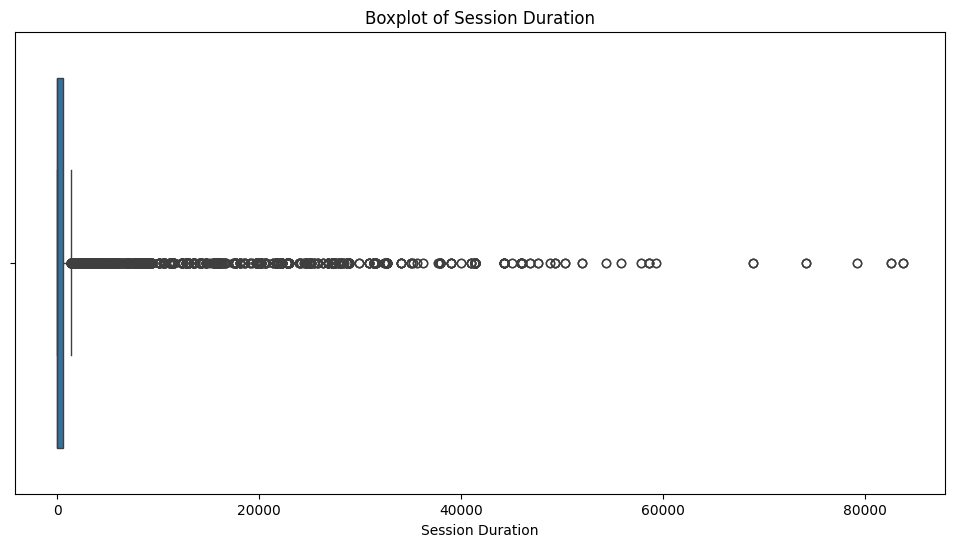

In [73]:
# Box plot for Session Duration
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_data['session_duration'])
plt.title('Boxplot of Session Duration')
plt.xlabel('Session Duration')
plt.show()


#### Insight

Session duration is a key indicator of user engagement. 

we can identify Extremely engaged users who spend a lot of time on the site, which might be useful for targeting high-value customers.

Sessions that are unusually short, which could indicate a problem with the user experience or data collection issues

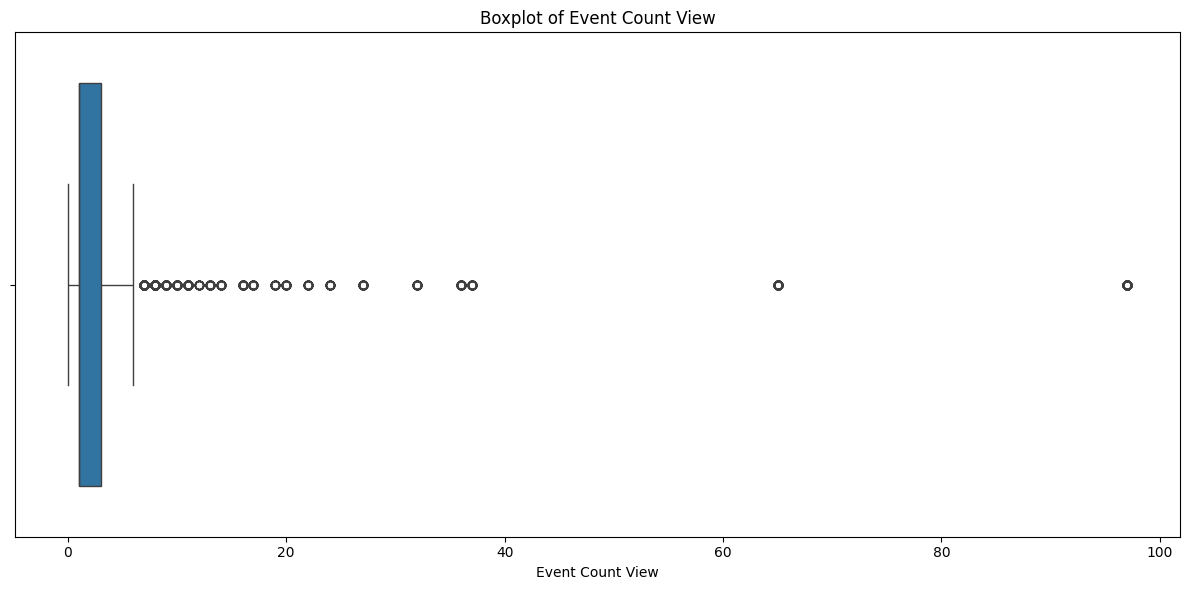

In [74]:
# Event Count view
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_data['event_count_view'])
plt.title('Boxplot of Event Count View')
plt.xlabel('Event Count View')

plt.tight_layout()
plt.show()


#### Insight

shows how many items a user views in a session.

Users who view an exceptionally high number of items, possibly showing very active browsing behavior.

Potential data errors where an unusually high number of views are recorded due to tracking issues.

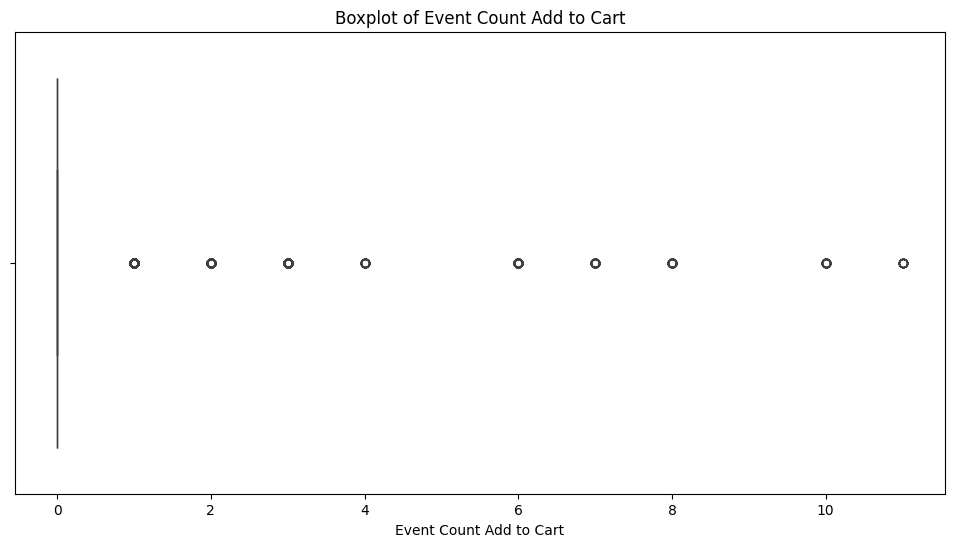

In [75]:
# event_count_addtocart
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_data['event_count_addtocart'])
plt.title('Boxplot of Event Count Add to Cart')
plt.xlabel('Event Count Add to Cart')
plt.show()


#### Insights

how many items a user adds to their cart. 

Users who are particularly interested in a large number of items, which might indicate strong purchase intent or bulk buying behavior.

Possible anomalies or issues with the add-to-cart functionality.

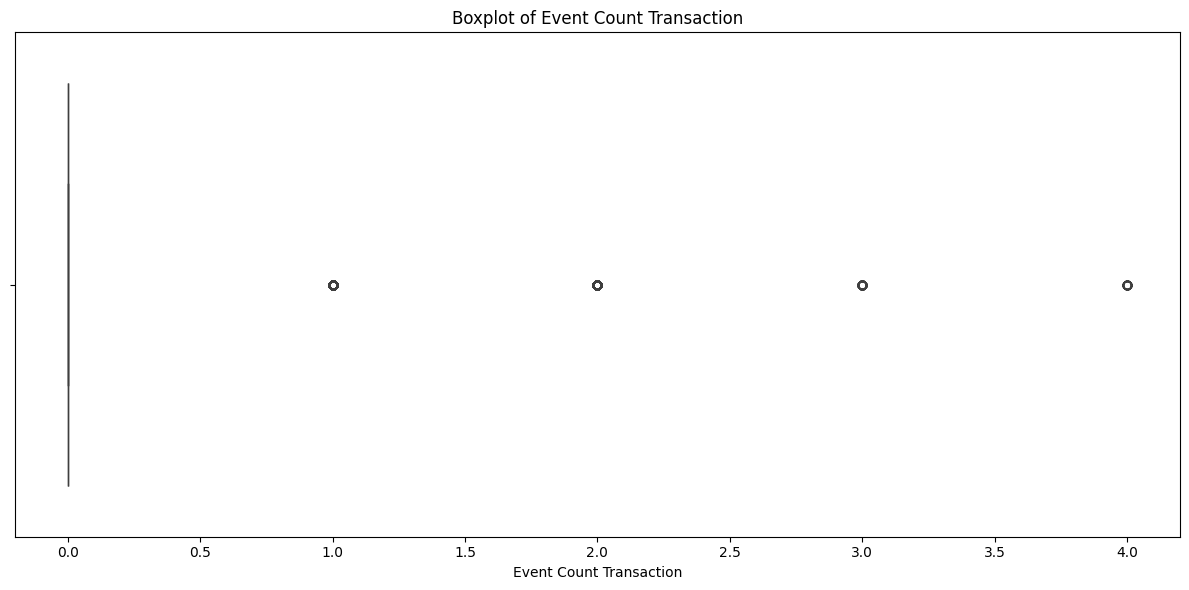

In [76]:
# event_count_transaction
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_data['event_count_transaction'])
plt.title('Boxplot of Event Count Transaction')
plt.xlabel('Event Count Transaction')

plt.tight_layout()
plt.show()


##### Insights

tracks the number of transactions.

Users who make a high number of purchases, which could be valuable for understanding frequent buyers and tailoring recommendations.

Potential data quality issues if transaction counts are unusually high.

### Handaling Outliers

In [77]:
# Function to detect and handle outliers using IQR method
def handle_outliers_iqr(df,columns):

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = merged_data[columns].quantile(0.25) 
    Q3 = merged_data[columns].quantile(0.75)

    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot the distribution of the column before removing outliers
    plt.figure(figsize=(10, 6))
    sns.histplot(df[columns], bins=50, kde=True)
    plt.title(f'Distribution of {columns} Before Removing Outliers')
    plt.show()

    # Remove outliers
    remove_outliers  = df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]

    # Plot the distribution of the column after removing outliers
    plt.figure(figsize=(10, 6))
    sns.histplot(remove_outliers[columns], bins=50, kde=True)
    plt.title(f'Distribution of {columns} After Removing Outliers')
    plt.show()
    
    return remove_outliers

In [78]:
# Columns to handle outliers
columns_to_check = ['session_duration', 'event_count_view', 'event_count_addtocart', 'event_count_transaction']

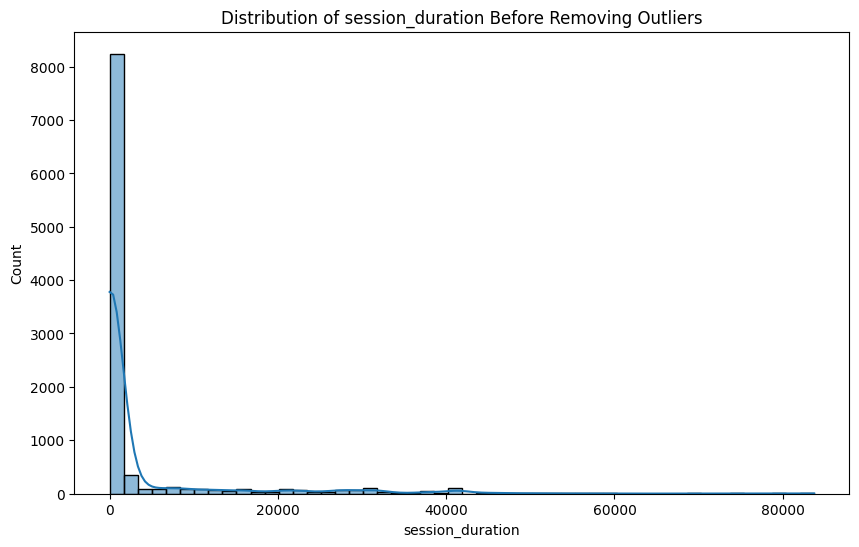

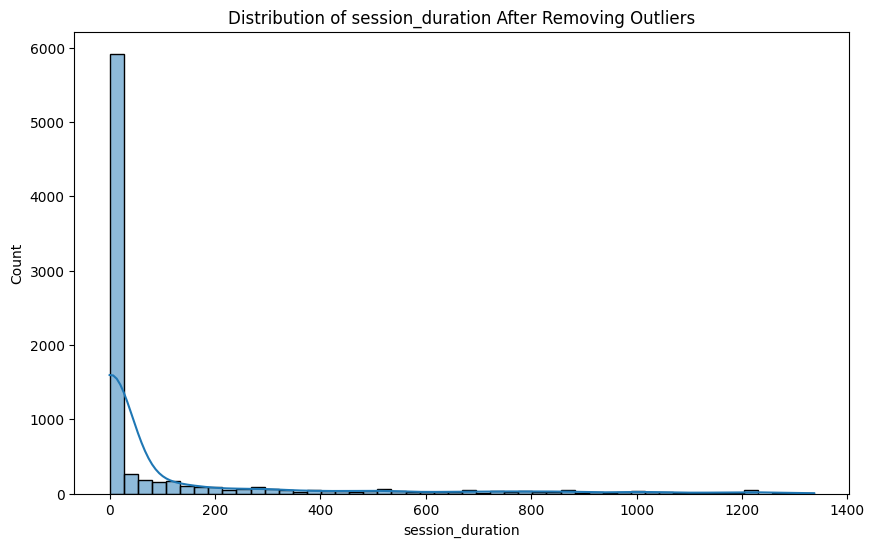

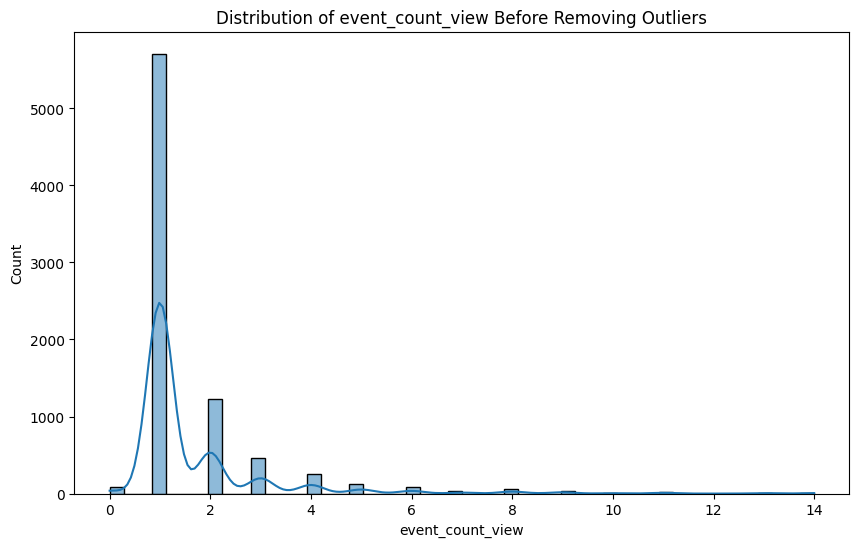

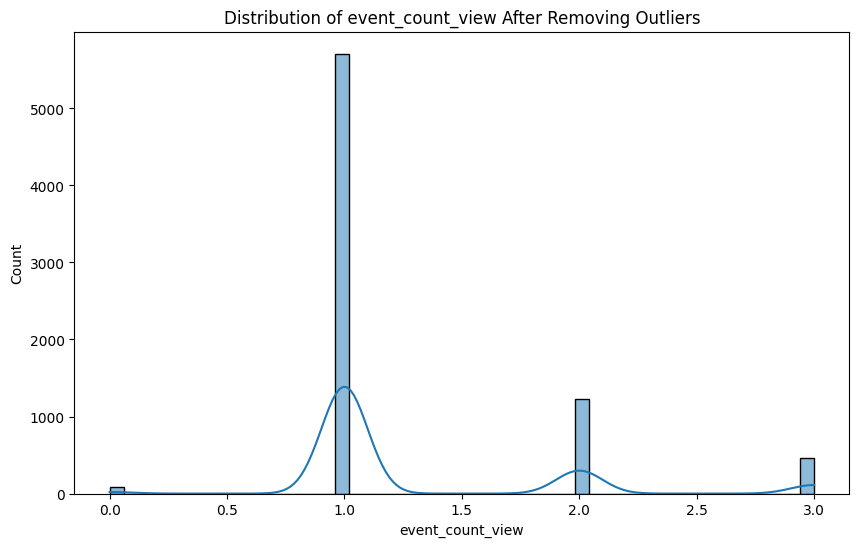

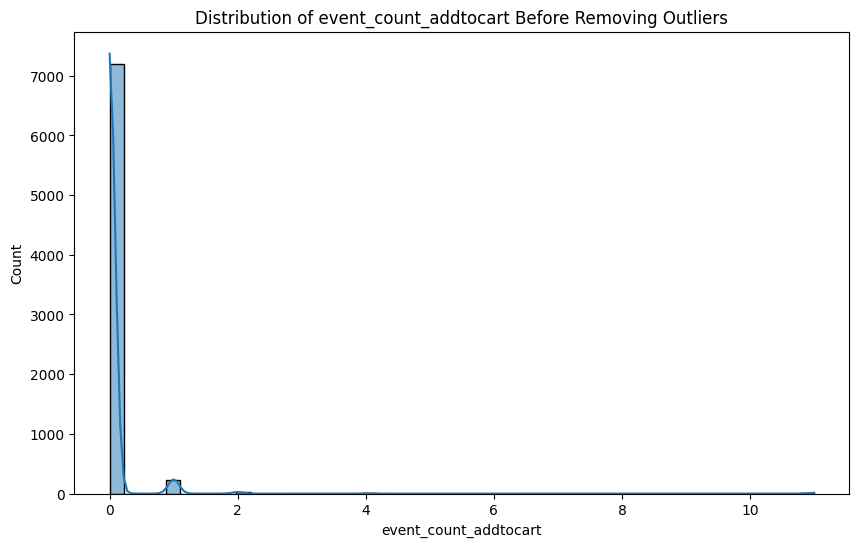

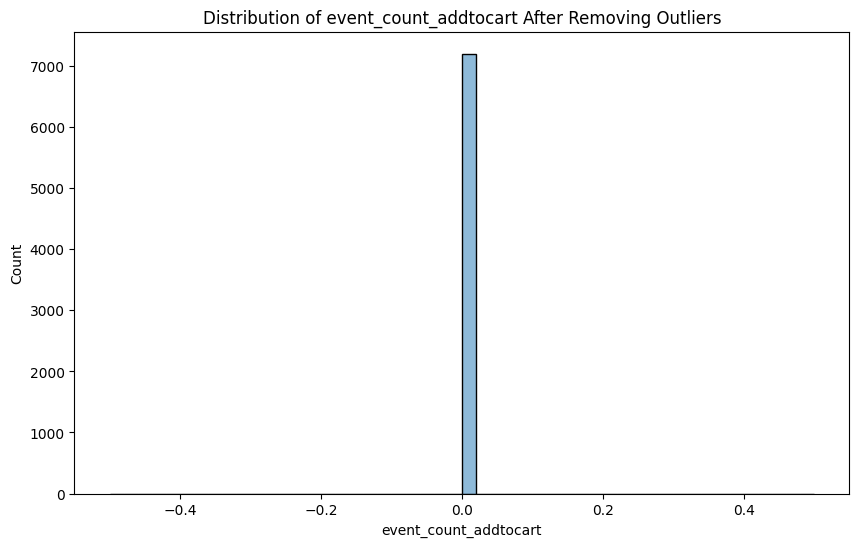

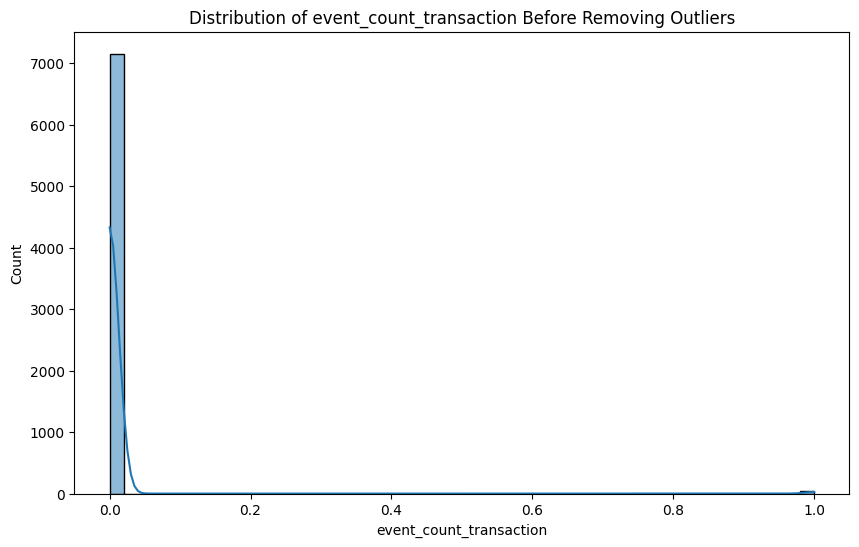

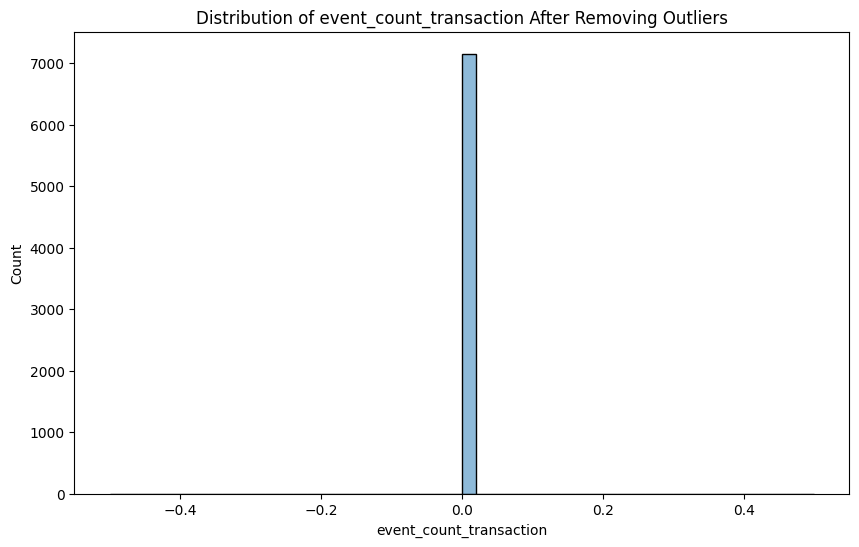

In [79]:
# Handle outliers for each column separately
for col in columns_to_check:
    merged_data = handle_outliers_iqr(merged_data, col)

# x axis show values of the column 
# y axis show frequency or density

In [80]:
merged_data.head()

,timestamp_x,visitorid,event,itemid,transactionid,year,month,day,hour,view,...,value_num_1,value_num_2,value_num_3,value_num_4,value_num_5,value_num_6,value_num_7,value_num_8,value_num_9,value_num_10
0,2015-06-02 05:02:12.117,257597,view,355908,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7156 entries, 0 to 10018
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp_x              7156 non-null   datetime64[ns]
 1   visitorid                7156 non-null   int64         
 2   event                    7156 non-null   object        
 3   itemid                   7156 non-null   int64         
 4   transactionid            7156 non-null   float64       
 5   year                     7156 non-null   int32         
 6   month                    7156 non-null   int32         
 7   day                      7156 non-null   int32         
 8   hour                     7156 non-null   int32         
 9   view                     7156 non-null   bool          
 10  addtocart                7156 non-null   bool          
 11  transaction              7156 non-null   bool          
 12  day_of_week              7156 non-null

In [82]:
merged_data.shape

(7156, 34)

### Balance Unbalance Dataset

In [91]:
# Select numerical columns for PCA
features  = ['session_duration', 'event_count_view', 'event_count_addtocart', 'event_count_transaction']

In [92]:
# Normalize the data
scaler = StandardScaler()
merged_data[features] = scaler.fit_transform(merged_data[features])


In [93]:
# Debug: Check unique values in 'event'
unique_events = merged_data['event'].unique()
print("Unique events:", unique_events)


Unique events: ['view']


In [98]:
events['event'].value_counts()

event
view           9661
addtocart       250
transaction      89
Name: count, dtype: int64

In [97]:
merged_data['event'].value_counts()

event
view    7156
Name: count, dtype: int64

In [89]:
merged_data_scaled

array([[-0.30592088, -0.49113945,  0.        ,  0.        ],
       [-0.30592088, -0.49113945,  0.        ,  0.        ],
       [-0.30592088, -0.49113945,  0.        ,  0.        ],
       ...,
       [-0.30592088, -0.49113945,  0.        ,  0.        ],
       [-0.30592088, -0.49113945,  0.        ,  0.        ],
       [-0.30592088, -0.49113945,  0.        ,  0.        ]])

In [90]:
X = merged_data_scaled[]

SyntaxError: invalid syntax (3584178082.py, line 1)

### step 11. Dimensionality Reduction (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=None) # algorithm will automatically determine the number of components or features to retain 
pca.fit(merged_data_scaled)


PCA()

In [ ]:
# Transform the data
merged_data_pca = pca.transform(merged_data_scaled)

In [ ]:
# Create a DataFrame with PCA components
pca_columns = [f'PC{i+1}' for i in range(merged_data_pca.shape[1])]
merged_data_pca_df = pd.DataFrame(merged_data_pca, columns=pca_columns)

In [ ]:
pca_columns

['PC1', 'PC2', 'PC3', 'PC4']

In [ ]:
# # Visualize the explained variance
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
# plt.title('Explained Variance by Principal Components')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Explained Variance Ratio')
# plt.show()


In [ ]:
# Decide on the number of components to keep (retain)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1 #total variance in the data that is explained or captured by each principal component (PC)

print(f'Number of components to retain 95% variance: {n_components}')


Number of components to retain 95% variance: 2


In [ ]:
# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
merged_data_pca = pca.fit_transform(merged_data_scaled)

In [ ]:
# Create a DataFrame with the reduced components
pca_columns = [f'PC{i+1}' for i in range(merged_data_pca.shape[1])]
merged_data_pca_df = pd.DataFrame(merged_data_pca, columns=pca_columns)

In [ ]:
merged_data_pca_df.head()

,PC1,PC2
0,0.604905,0.828861
1,-0.011001,-0.452939
2,-0.691558,0.198291
3,-0.354921,-0.130965
4,-0.262862,-0.038906


### 13. Data Visualization

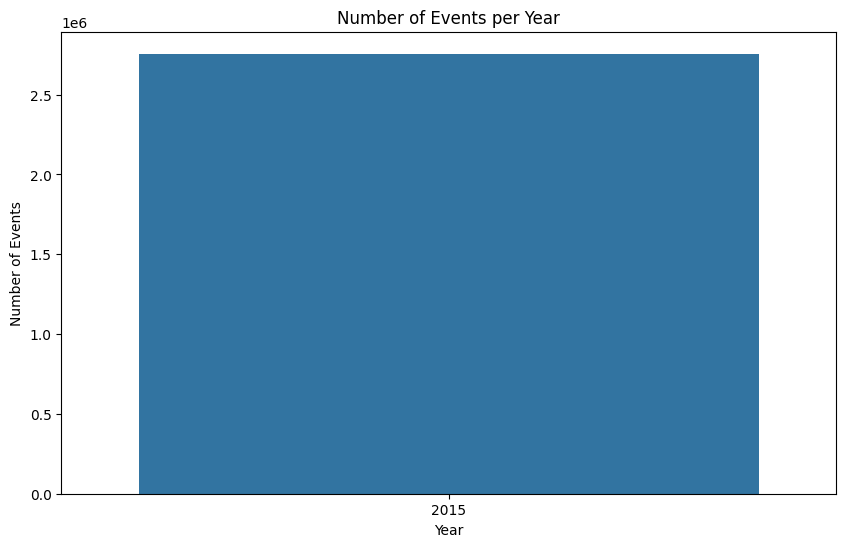

In [ ]:
# yearly Activity (This can show trends over the years)
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=events)
plt.title('Number of Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

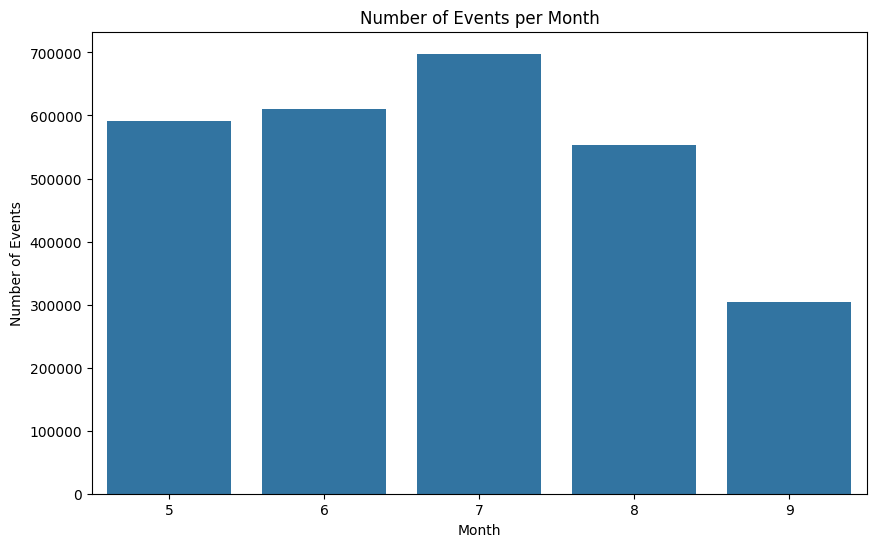

In [ ]:
# Monthly Activity (indicating peak months for user activity)
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=events)
plt.title('Number of Events per Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.show()

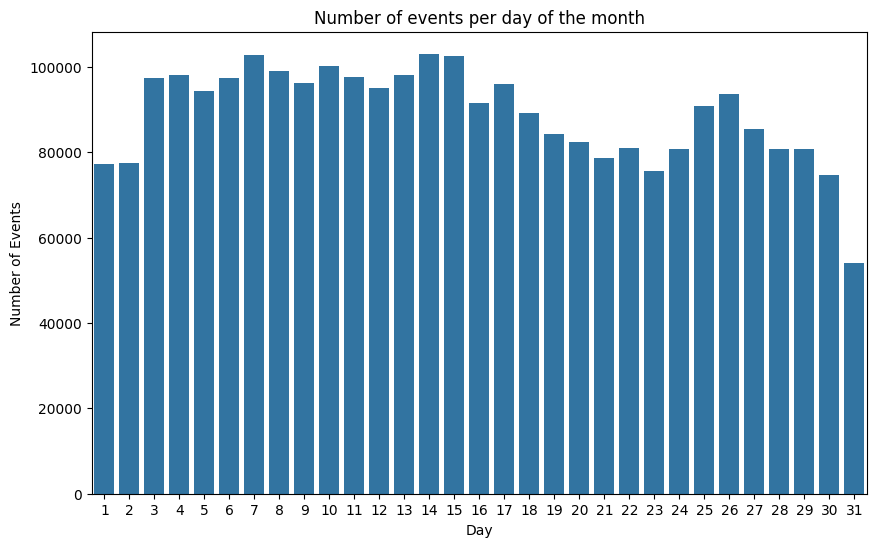

In [ ]:
# Daily Activity (helps to understand if certain days of the month are busier than others)
plt.figure(figsize=(10,6))
sns.countplot(x="day", data=events)
plt.title("Number of events per day of the month")
plt.xlabel("Day")
plt.ylabel("Number of Events")
plt.show()

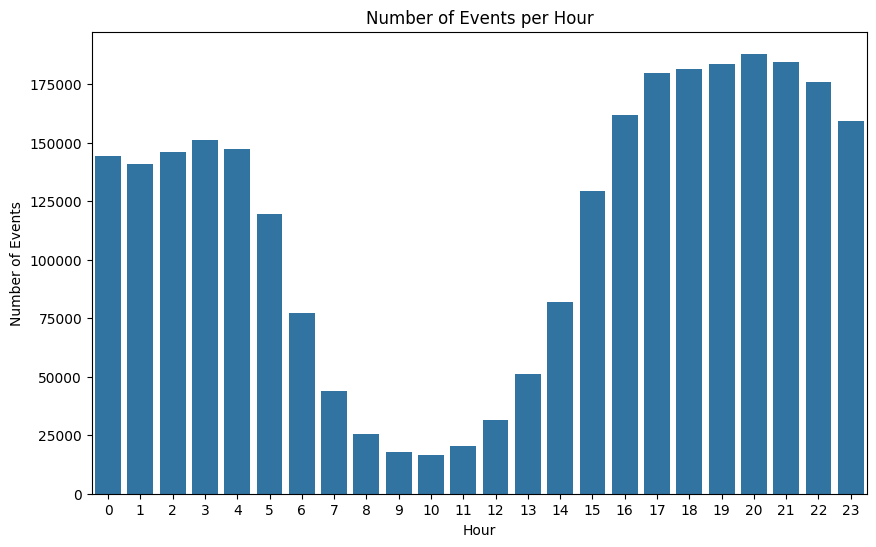

In [ ]:
# Hourly Activity (shows daily patterns and peak hours for user activity)
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=events)
plt.title('Number of Events per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Events')
plt.show()


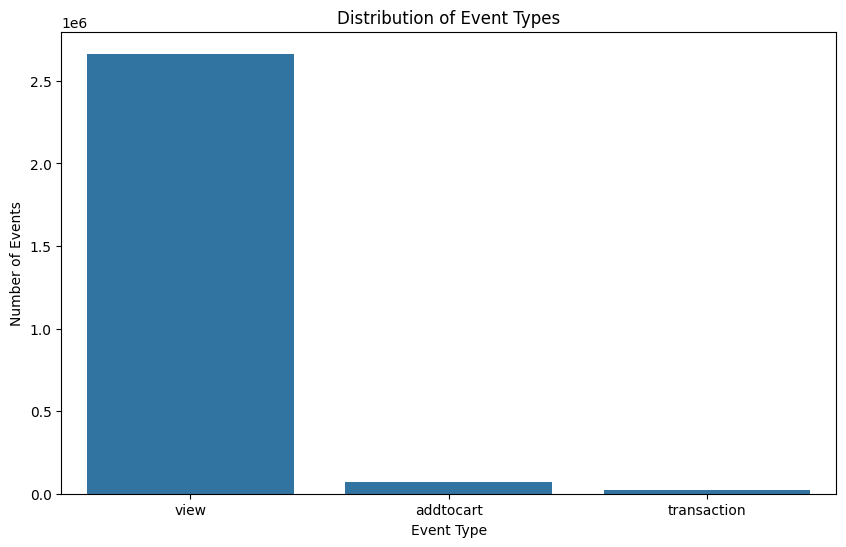

In [ ]:
# Event Type Distribution (shows the proportion of different event types (view, add to cart, transaction))
plt.figure(figsize=(10, 6))
sns.countplot(x='event', data=events)
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.show()


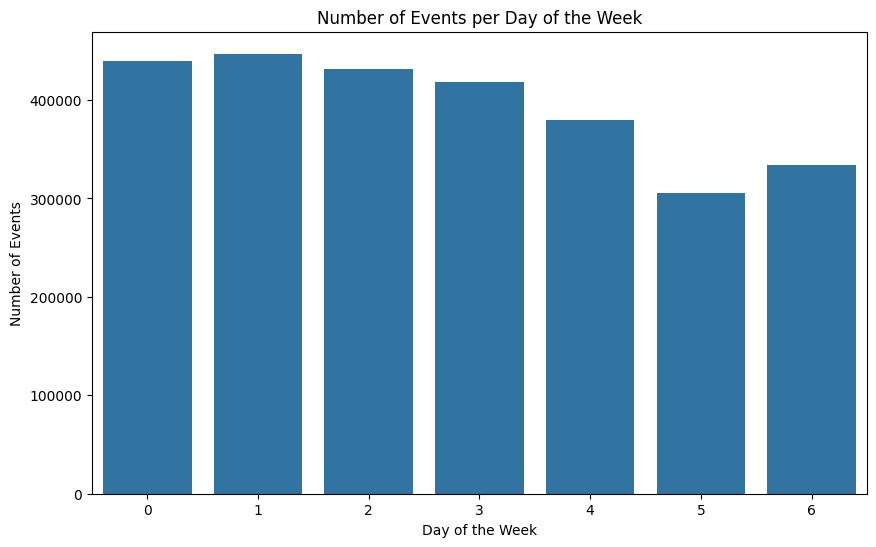

In [ ]:
# Day of the Week Activity (Identifies which days of the week have the highest or lowest activity)
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=events)
plt.title('Number of Events per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.show()

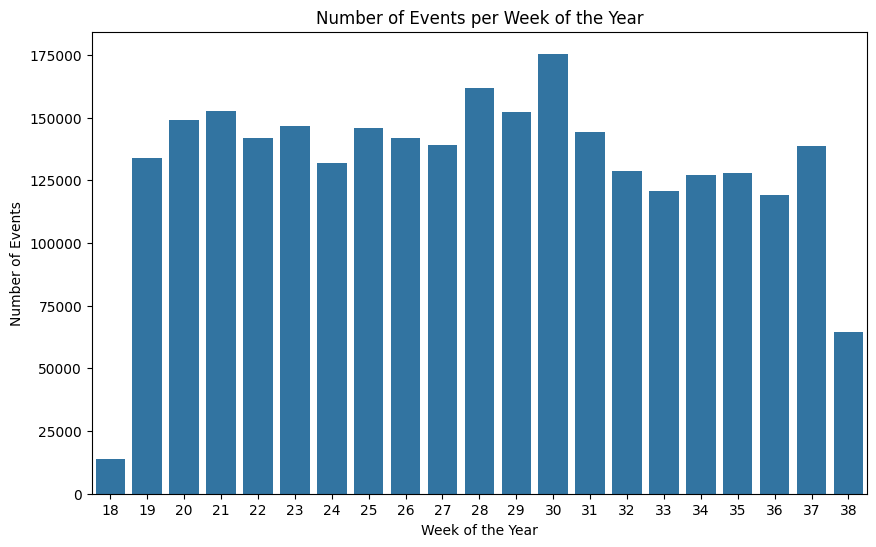

In [ ]:
# Week of the Year Activity (Detects seasonal patterns and peak weeks.)
plt.figure(figsize=(10, 6))
sns.countplot(x='week_of_year', data=events)
plt.title('Number of Events per Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Events')
plt.show()


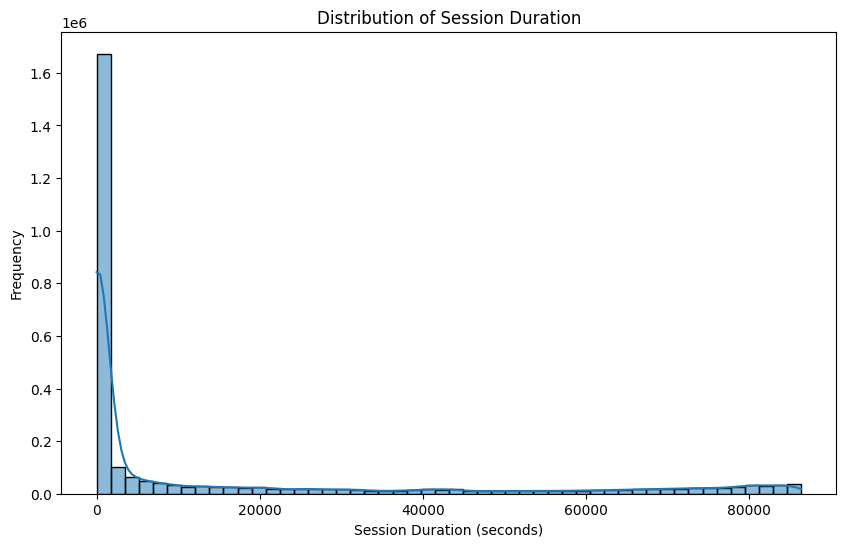

In [ ]:
# Session Duration Distribution (Understand the typical length of user sessions, which can indicate engagement levels)
plt.figure(figsize=(10, 6))
sns.histplot(events['session_duration'], bins=50, kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1875021 entries, 2 to 2761172
Data columns (total 34 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   timestamp_x              datetime64[ns]
 1   visitorid                int64         
 2   event                    object        
 3   itemid                   int64         
 4   transactionid            float64       
 5   year                     int32         
 6   month                    int32         
 7   day                      int32         
 8   hour                     int32         
 9   view                     bool          
 10  addtocart                bool          
 11  transaction              bool          
 12  day_of_week              int32         
 13  week_of_year             UInt32        
 14  session_duration         int64         
 15  event_count_addtocart    int64         
 16  event_count_transaction  int64         
 17  event_count_view         int64  

In [ ]:
merged_data.shape

(1875021, 34)

In [ ]:
merged_data_scaled

array([[ 1.01382603, -0.15836081,  0.        ,  0.        ],
       [-0.32805511,  0.31249676,  0.        ,  0.        ],
       [-0.3487924 , -0.62921839,  0.        ,  0.        ],
       ...,
       [-0.3487924 , -0.62921839,  0.        ,  0.        ],
       [-0.31075115, -0.15836081,  0.        ,  0.        ],
       [-0.3487924 , -0.62921839,  0.        ,  0.        ]])

In [ ]:
merged_data.head()

,timestamp_x,visitorid,event,itemid,transactionid,year,month,day,hour,view,...,value_num_1,value_num_2,value_num_3,value_num_4,value_num_5,value_num_6,value_num_7,value_num_8,value_num_9,value_num_10
2,2015-06-02 05:13:19.827,111016,view,318965,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-06-02 05:48:06.234,972639,view,22556,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-06-02 05:12:03.240,810725,view,443030,0.0,2015,6,2,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_data.shape

(1875021, 34)

In [ ]:
events["event"].value_counts()

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [ ]:
merged_data_pca_df.head()

,PC1,PC2
0,0.604905,0.828861
1,-0.011001,-0.452939
2,-0.691558,0.198291
3,-0.354921,-0.130965
4,-0.262862,-0.038906


## Machine Learning Model
